# Set Up

In [1]:
# import the necessary packages

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd 

from model import * 
from utils import * 

import albumentations as A
from PIL  import Image 

# Buliding dataset

In [3]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [7]:
imagePaths = (  list(paths.list_images('Face Mask Dataset/Train')) 
              + list(paths.list_images('Face Mask Dataset/Validation'))
              + list(paths.list_images('Face Mask Dataset/Test')) ) 

In [8]:
labels = [] 
image_paths = []
for path in imagePaths : 
    label = path.split('/')[-2] 
    
    if label == 'WithMask' : 
        labels.append(1)
    else : 
        labels.append(0)
        
    image_paths.append(path)
    
data = pd.DataFrame(data = {'path' : image_paths , 'target' : labels})

In [9]:
train , valid = train_test_split(data , test_size = 0.2 , stratify = data.target , random_state = 42 )

In [10]:
data.target.mean()

0.4988975576662144

In [11]:
train.target.mean()

0.4988868864624192

In [12]:
train.head()

,path,target
3131,Face Mask Dataset/Train/WithoutMask/2717.png,0
11696,Face Mask Dataset/Test/WithMask/Augmented_211_...,1
2134,Face Mask Dataset/Train/WithoutMask/4739.png,0
9811,Face Mask Dataset/Train/WithMask/Augmented_96_...,1
7963,Face Mask Dataset/Train/WithMask/Augmented_483...,1


# Training 

In [14]:
# Setting Hyper Parametres 
lr = 0.0001 
epochs = 100
batch_size = 64 
model_path = 'detector.pth' 
device = torch.device('cuda')

model = FaceNet(True)
model = model.to(device)

train_dataset = MaskFaceDetectionDataset(train , is_train = True) 
valid_dataset = MaskFaceDetectionDataset(valid , is_train = False) 


run(
    model,
    train_dataset,
    valid_dataset,
    loss_fn,
    lr,
    epochs,
    batch_size,
    batch_size,
    device,
    model_path,
)


--------- Epoch 0 ---------


100%|██████████| 148/148 [01:01<00:00,  2.39it/s, loss=0.0301]

 train_loss  = 0.029985574732465367



100%|██████████| 37/37 [00:07<00:00,  4.86it/s, loss=0.00578]


 val_loss  = 0.005761264853267553
--------- Epoch 1 ---------


100%|██████████| 148/148 [00:58<00:00,  2.54it/s, loss=0.00939]

 train_loss  = 0.009357265170979805



100%|██████████| 37/37 [00:06<00:00,  6.03it/s, loss=0.00816]

 val_loss  = 0.008139040524445198
--------- Epoch 2 ---------



100%|██████████| 148/148 [00:58<00:00,  2.54it/s, loss=0.00529]

 train_loss  = 0.005280913199090424



100%|██████████| 37/37 [00:05<00:00,  6.23it/s, loss=0.0123]

 val_loss  = 0.012290387928825678
--------- Epoch 3 ---------



100%|██████████| 148/148 [00:58<00:00,  2.54it/s, loss=0.00328]

 train_loss  = 0.0034102926274499623



100%|██████████| 37/37 [00:06<00:00,  6.12it/s, loss=0.00697]

 val_loss  = 0.006946772814125005
--------- Epoch 4 ---------



100%|██████████| 148/148 [00:58<00:00,  2.52it/s, loss=0.00573]

 train_loss  = 0.005715677031509364



100%|██████████| 37/37 [00:06<00:00,  5.77it/s, loss=0.00549]


 val_loss  = 0.005543923570823265
--------- Epoch 5 ---------


100%|██████████| 148/148 [00:58<00:00,  2.52it/s, loss=0.00842]

 train_loss  = 0.008386143928529802



100%|██████████| 37/37 [00:06<00:00,  5.82it/s, loss=0.00885]

 val_loss  = 0.008818289540736383
--------- Epoch 6 ---------



100%|██████████| 148/148 [00:59<00:00,  2.51it/s, loss=0.00404]

 train_loss  = 0.004053135603695606



100%|██████████| 37/37 [00:06<00:00,  5.63it/s, loss=0.00658]

 val_loss  = 0.006552083857083769
--------- Epoch 7 ---------



100%|██████████| 148/148 [00:58<00:00,  2.53it/s, loss=0.00577]

 train_loss  = 0.005744449321478109



100%|██████████| 37/37 [00:06<00:00,  5.56it/s, loss=0.0067]

 val_loss  = 0.0066748879474510655
--------- Epoch 8 ---------



100%|██████████| 148/148 [00:58<00:00,  2.53it/s, loss=0.00109]

 train_loss  = 0.001085079282409031



100%|██████████| 37/37 [00:06<00:00,  5.64it/s, loss=0.00465]


 val_loss  = 0.004639335386289875
--------- Epoch 9 ---------


100%|██████████| 148/148 [00:59<00:00,  2.48it/s, loss=0.00308]

 train_loss  = 0.0030687692555934395



100%|██████████| 37/37 [00:07<00:00,  5.20it/s, loss=0.00633]


 val_loss  = 0.0063084082718174814
--------- Epoch 10 ---------


100%|██████████| 148/148 [00:58<00:00,  2.52it/s, loss=0.00367]

 train_loss  = 0.0036705739076825085



100%|██████████| 37/37 [00:07<00:00,  5.27it/s, loss=0.00453]


 val_loss  = 0.004518021955084043
--------- Epoch 11 ---------


100%|██████████| 148/148 [00:59<00:00,  2.48it/s, loss=0.0018]

 train_loss  = 0.0017976890658984131



100%|██████████| 37/37 [00:06<00:00,  6.07it/s, loss=0.00524]

 val_loss  = 0.0052339865340990084
--------- Epoch 12 ---------



100%|██████████| 148/148 [00:59<00:00,  2.50it/s, loss=0.00395]

 train_loss  = 0.003935262306112162



100%|██████████| 37/37 [00:06<00:00,  5.92it/s, loss=0.032]

 val_loss  = 0.032081854488087876
--------- Epoch 13 ---------



100%|██████████| 148/148 [00:59<00:00,  2.48it/s, loss=0.00764]

 train_loss  = 0.007605505587619248



100%|██████████| 37/37 [00:06<00:00,  6.13it/s, loss=0.00772]

 val_loss  = 0.0076922485773015855
--------- Epoch 14 ---------



100%|██████████| 148/148 [00:59<00:00,  2.50it/s, loss=0.00397]

 train_loss  = 0.0039497482840193405



100%|██████████| 37/37 [00:06<00:00,  5.99it/s, loss=0.00625]


Epoch    15: reducing learning rate of group 0 to 2.0000e-05.
 val_loss  = 0.006230373716420759
--------- Epoch 15 ---------


100%|██████████| 148/148 [00:59<00:00,  2.49it/s, loss=0.00122]

 train_loss  = 0.0012156219763587491



100%|██████████| 37/37 [00:06<00:00,  5.92it/s, loss=0.00538]

 val_loss  = 0.005359789010047255
--------- Epoch 16 ---------



100%|██████████| 148/148 [01:00<00:00,  2.46it/s, loss=0.000532]

 train_loss  = 0.0005300782472290479



100%|██████████| 37/37 [00:06<00:00,  6.03it/s, loss=0.00534]


 val_loss  = 0.005322875353281356
Eraly Stopping on Epoch 16
Best Loss =  0.004518021955084043


([0.005761264853267553,
  0.008139040524445198,
  0.012290387928825678,
  0.006946772814125005,
  0.005543923570823265,
  0.008818289540736383,
  0.006552083857083769,
  0.0066748879474510655,
  0.004639335386289875,
  0.0063084082718174814,
  0.004518021955084043,
  0.0052339865340990084,
  0.032081854488087876,
  0.0076922485773015855,
  0.006230373716420759,
  0.005359789010047255,
  0.005322875353281356],
 [0.029985574732465367,
  0.009357265170979805,
  0.005280913199090424,
  0.0034102926274499623,
  0.005715677031509364,
  0.008386143928529802,
  0.004053135603695606,
  0.005744449321478109,
  0.001085079282409031,
  0.0030687692555934395,
  0.0036705739076825085,
  0.0017976890658984131,
  0.003935262306112162,
  0.007605505587619248,
  0.0039497482840193405,
  0.0012156219763587491,
  0.0005300782472290479])

# Model Evaluation 

In [15]:
pred  = predict(model , valid_dataset)
pred = sigmod(pred)
predictions = np.array((pred>0.5) , dtype = int)
valid['predictions'] = predictions

100%|██████████| 37/37 [00:06<00:00,  5.86it/s]


In [1]:
classification_report(valid.target.values , predictions)

NameError: name 'classification_report' is not defined

In [21]:
accuracy_score(valid.target.values , valid.predictions.values)

0.9983043662568886

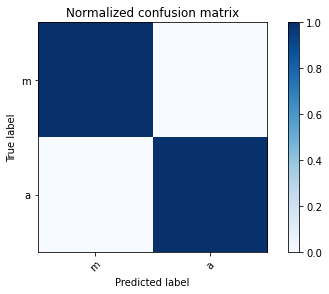

In [22]:
cm = confusion_matrix(valid.target.values , valid.predictions.values)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

# Inference

In [68]:
%%time
model_path = 'mask_detector.onnx'
predicator = Predicator(model_path)
image_path = 'Face Mask Dataset/Test/WithMask/1404.png'
image = Image.open(image_path)  
predicator.batch_pred([image])

CPU times: user 277 ms, sys: 79.1 ms, total: 356 ms
Wall time: 245 ms


array([[0.9996152]], dtype=float32)

CPU times: user 48 ms, sys: 80 µs, total: 48.1 ms
Wall time: 44.4 ms


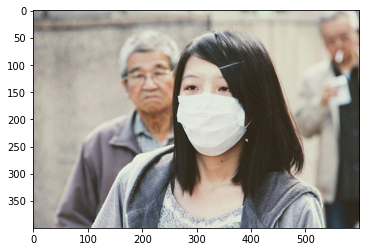

In [66]:
%%time
image_path = 'examples/example.png'
image = Image.open(image_path)  
plt.imshow(image)

# Video 

In [111]:
prototxtPath = 'face_detector/deploy.prototxt'
weightsPath =  'face_detector/res10_300x300_ssd_iter_140000.caffemodel'
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

model_path = 'mask_detector.onnx'
predicator = Predicator(model_path)

image_path = 'examples/example.png'
frame = cv2.imread(image_path)  

In [112]:
locs , preds = detect_and_predict_mask(frame , faceNet , predicator)

In [113]:
for (box, pred) in zip(locs, preds):
    # unpack the bounding box and predictions
    (startX, startY, endX, endY) = box

    # determine the class label and color we'll use to draw
    # the bounding box and text
    label = "Mask" if pred[0] > 0.5 else "No Mask"
    color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

    # include the probability in the label
    label = "{}: {:.2f}%".format(label, pred[0] * 100)

    # display the label and bounding box rectangle on the output
    # frame
    cv2.putText(frame, label, (startX, startY - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
    cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

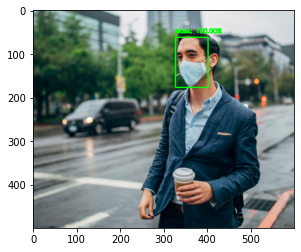

In [114]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)